In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.shape

(1000, 40)

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
df['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [9]:
df['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

In [10]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [11]:
df['policy_bind_date'].value_counts()

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [12]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [13]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [14]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [15]:
df.drop('_c39',axis=1,inplace=True)

In [16]:
df['age'].value_counts()

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

In [17]:
df['age'].nunique()

46

In [18]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [19]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [20]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [21]:
 df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [22]:
df['incident_date']=pd.to_datetime(df['incident_date'])

In [23]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [24]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [25]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [26]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [27]:
df['capital-gains'].value_counts()

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64

In [28]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [29]:
#Visualization

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

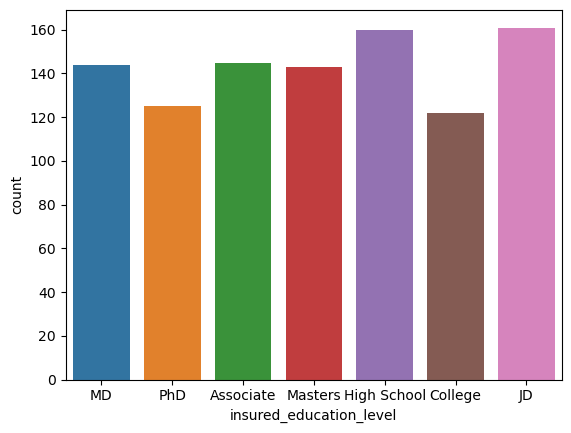

In [30]:
sns.countplot(df['insured_education_level'])

In [31]:
#Most of the people belongs to Ho=igh school and HD then MD, Associate and masters

<AxesSubplot:xlabel='policy_state', ylabel='count'>

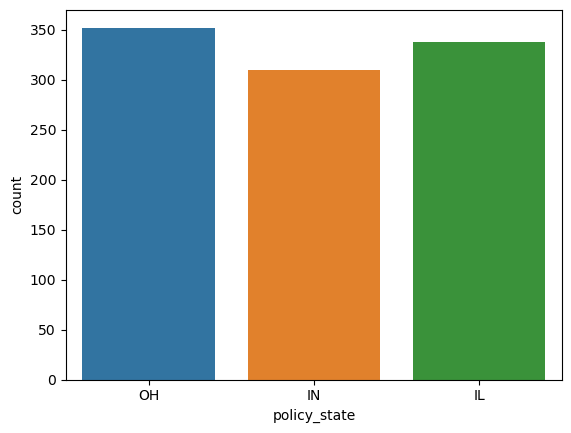

In [32]:
sns.countplot(df['policy_state'])

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

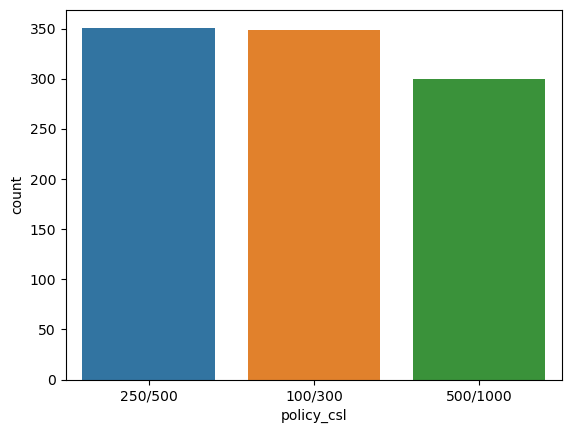

In [33]:
sns.countplot(df['policy_csl'])

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

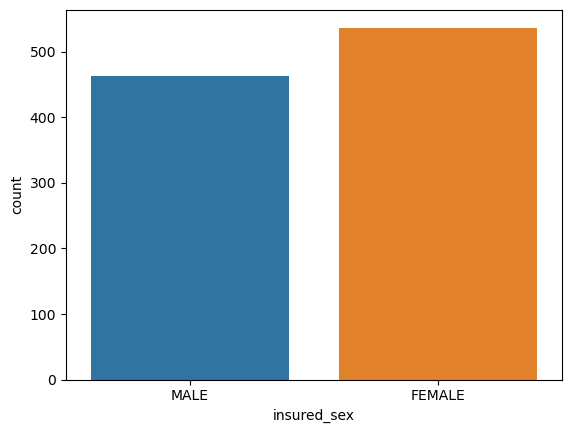

In [34]:
sns.countplot(df['insured_sex'])

In [35]:
#Majority of the people belong to female group

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

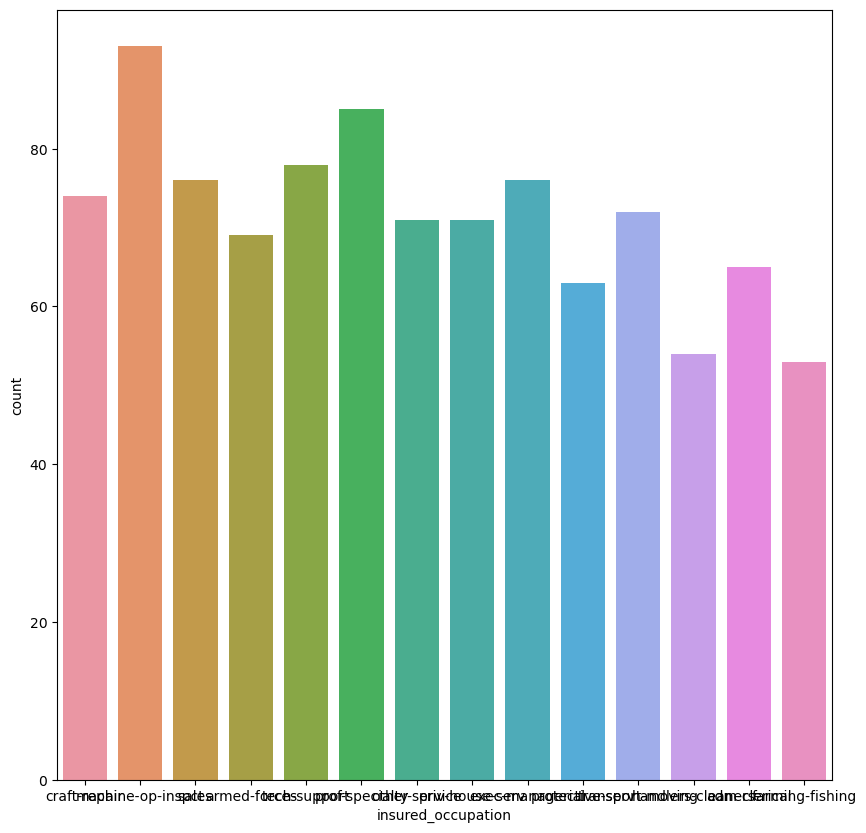

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(df['insured_occupation'])

In [37]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [38]:
#Majority of the people belongs to machine operator and professor , tech support occupation, and least belongs to Farming and cleaning group

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

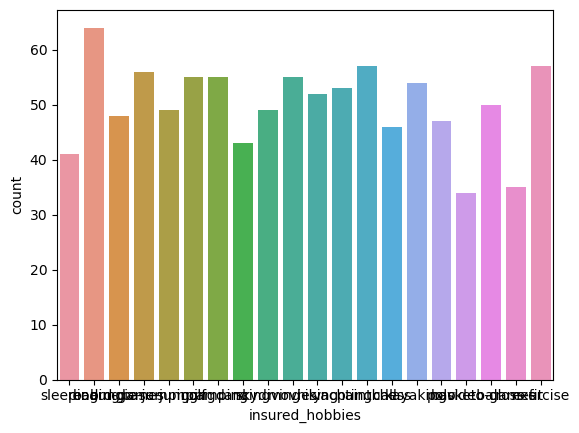

In [39]:
sns.countplot(df['insured_hobbies'])

In [40]:
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

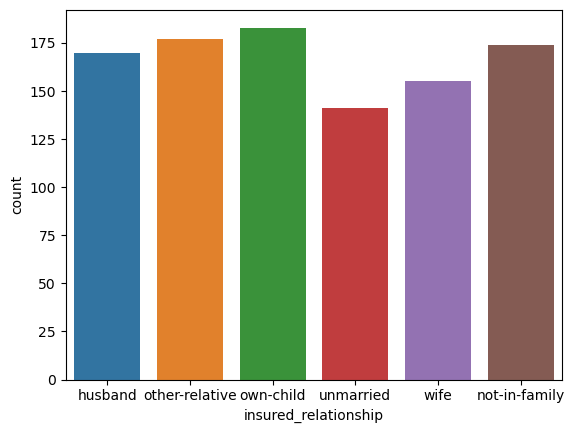

In [41]:
sns.countplot(df['insured_relationship'])

<AxesSubplot:xlabel='incident_type', ylabel='count'>

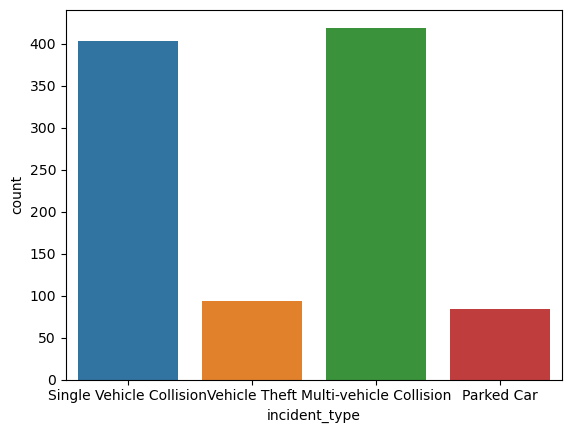

In [42]:
sns.countplot(df['incident_type'])

In [43]:
#Most of the incidents are Multi and single vehicle 

<AxesSubplot:xlabel='collision_type', ylabel='count'>

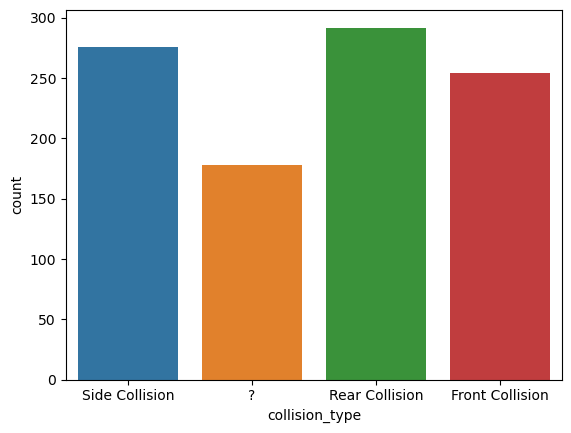

In [44]:
sns.countplot(df['collision_type'])

In [45]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [46]:
df['collision_type'].replace('?',float('nan'),inplace=True)

In [47]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [48]:
df['collision_type'].isnull().sum()

178

In [49]:
from sklearn.impute import SimpleImputer

In [50]:
imp=SimpleImputer(strategy='random')

In [51]:
def random_imputer(column):
    mask=column.isnull()
    column[mask]=np.random.choice(column[~mask],size=mask.sum())
    return column
df['collision_type']=random_imputer(df['collision_type'])

In [52]:
df['collision_type'].value_counts()

Rear Collision     358
Side Collision     338
Front Collision    304
Name: collision_type, dtype: int64

In [53]:
df['collision_type'].isnull().sum()

0

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

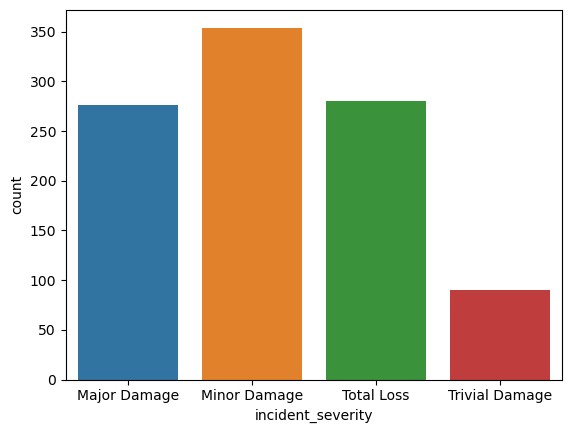

In [54]:
sns.countplot(df['incident_severity'])

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

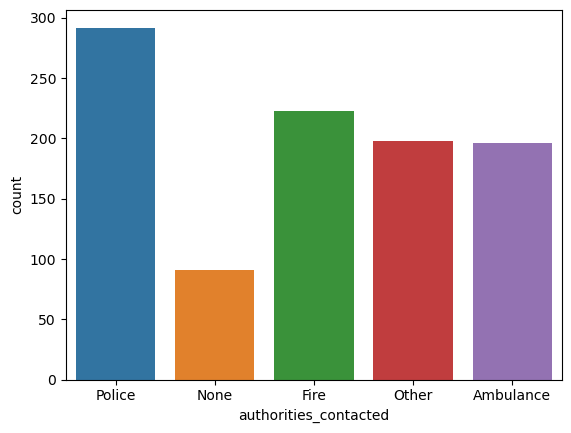

In [55]:
sns.countplot(df['authorities_contacted'])

<AxesSubplot:xlabel='incident_state', ylabel='count'>

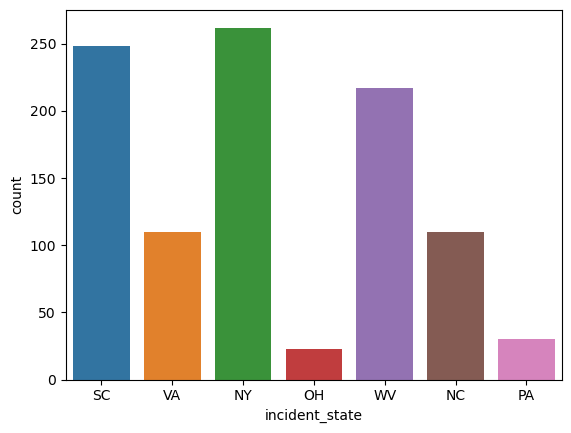

In [56]:
sns.countplot(df['incident_state'])

In [57]:
#Most of the incidents happend in  New York and South California and least in oh

<AxesSubplot:xlabel='incident_city', ylabel='count'>

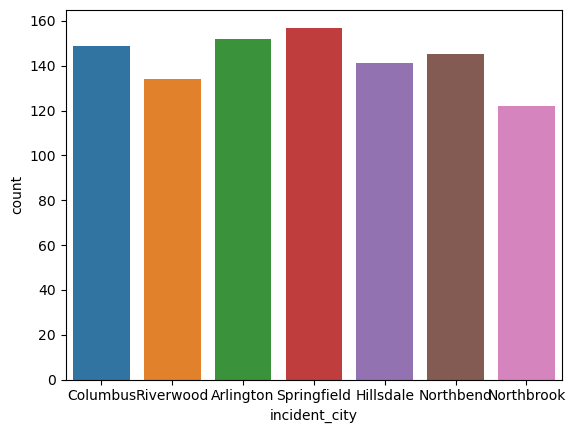

In [58]:
sns.countplot(df['incident_city'])

In [59]:
#Almost all the cities have same no. of incidents with some ups and downs

<AxesSubplot:xlabel='incident_location', ylabel='count'>

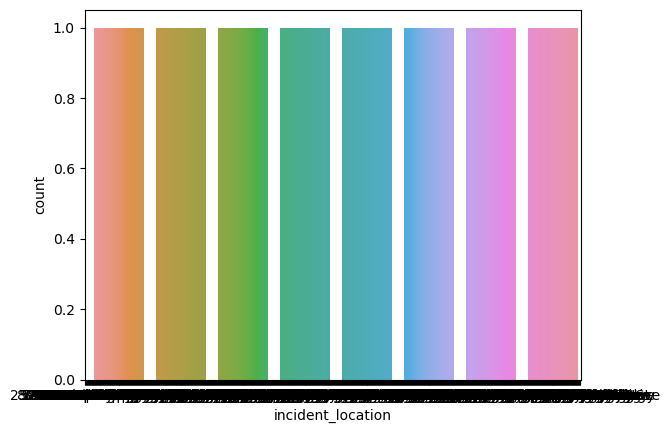

In [60]:
sns.countplot(df['incident_location'])

In [61]:
df['incident_location'].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

In [62]:
df['incident_location'].nunique()

1000

In [63]:
#All the locations are different/ Unique

<AxesSubplot:xlabel='property_damage', ylabel='count'>

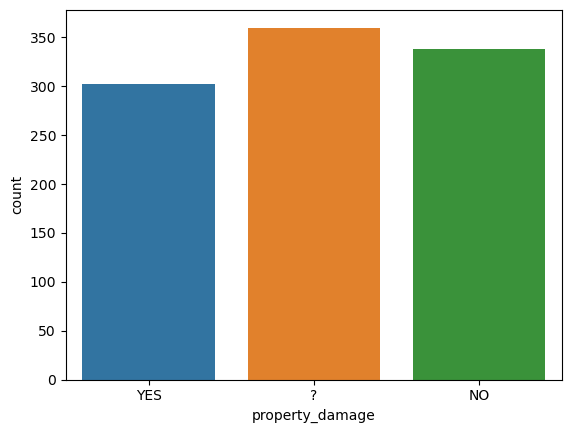

In [64]:
sns.countplot(df['property_damage'])

In [65]:
df['property_damage'].replace('?',float('nan'),inplace=True)

In [66]:
df['property_damage']=random_imputer(df['property_damage'])

In [67]:
df['property_damage'].value_counts()

NO     539
YES    461
Name: property_damage, dtype: int64

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

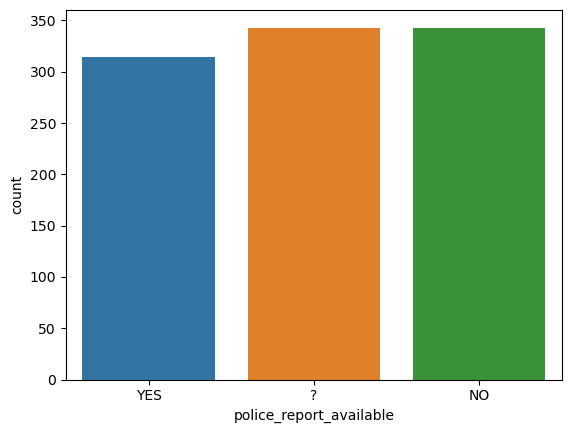

In [68]:
sns.countplot(df['police_report_available'])

In [69]:
df['police_report_available'].replace('?',float('nan'),inplace=True)

In [70]:
df['police_report_available']=random_imputer(df['police_report_available'])

In [71]:
df['police_report_available'].value_counts()

NO     519
YES    481
Name: police_report_available, dtype: int64

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

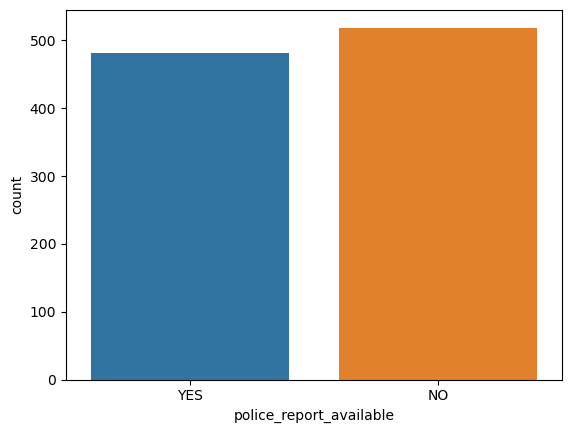

In [72]:
sns.countplot(df['police_report_available'])

<AxesSubplot:xlabel='auto_make', ylabel='count'>

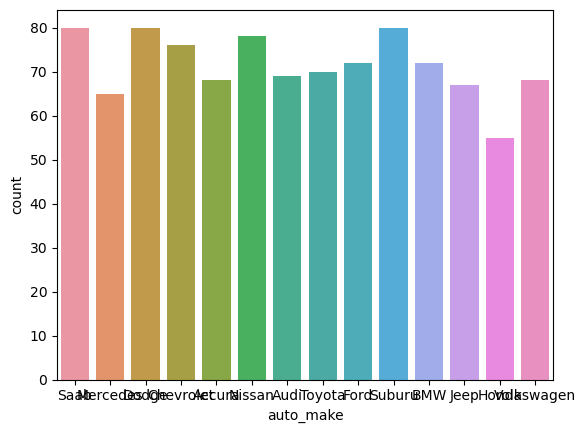

In [73]:
sns.countplot(df['auto_make'])

In [74]:
df['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

<AxesSubplot:xlabel='auto_model', ylabel='count'>

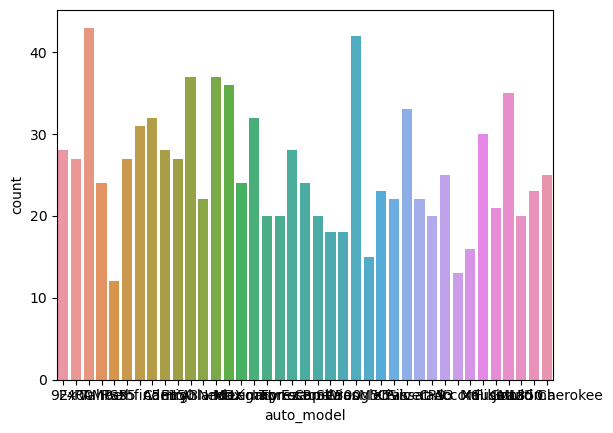

In [75]:
sns.countplot(df['auto_model'])

In [76]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

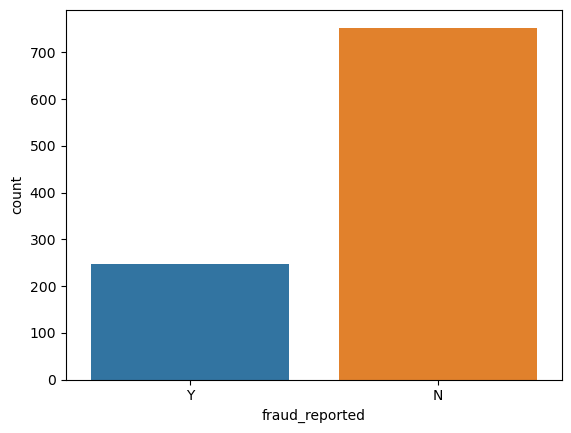

In [77]:
sns.countplot(df['fraud_reported'])

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

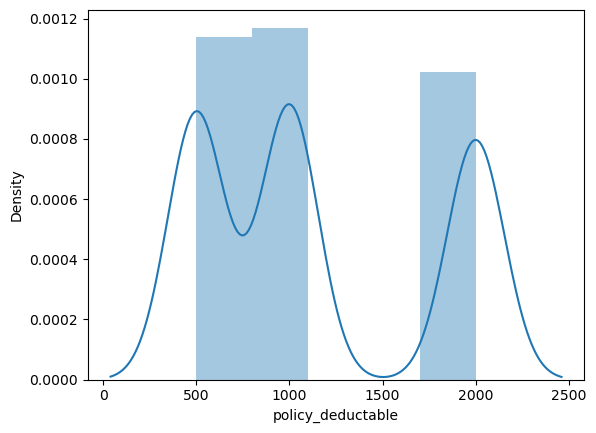

In [78]:
sns.distplot(df['policy_deductable'])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

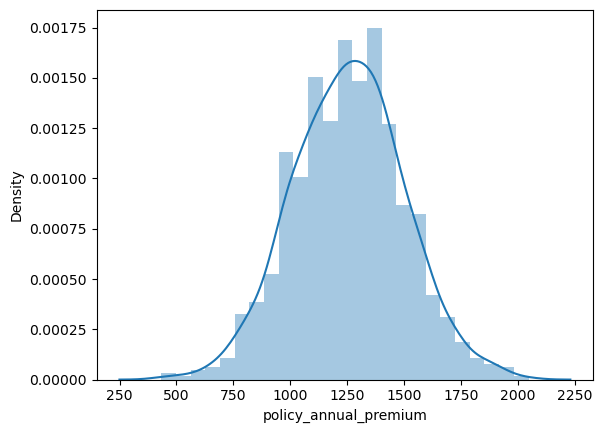

In [79]:
sns.distplot(df['policy_annual_premium'])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

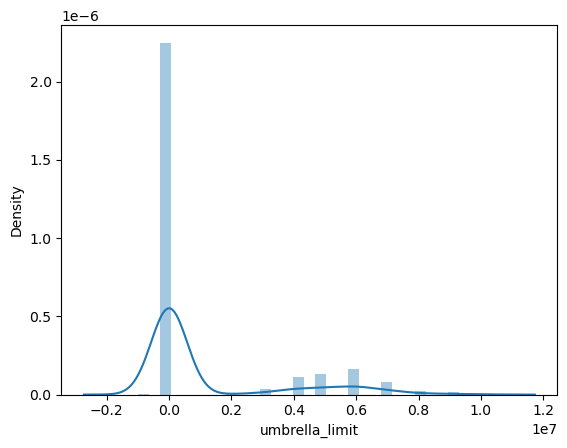

In [80]:
sns.distplot(df['umbrella_limit'])

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

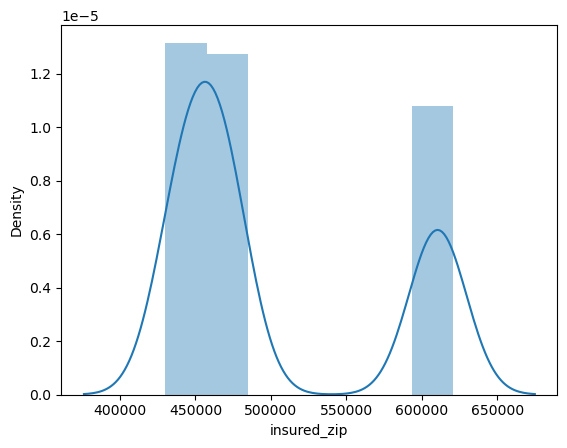

In [81]:
sns.distplot(df['insured_zip'])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

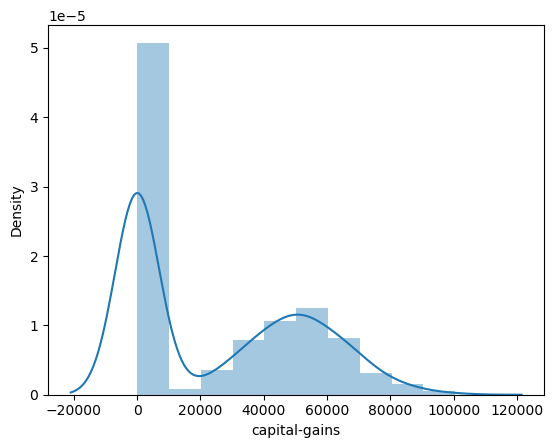

In [82]:
sns.distplot(df['capital-gains'])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

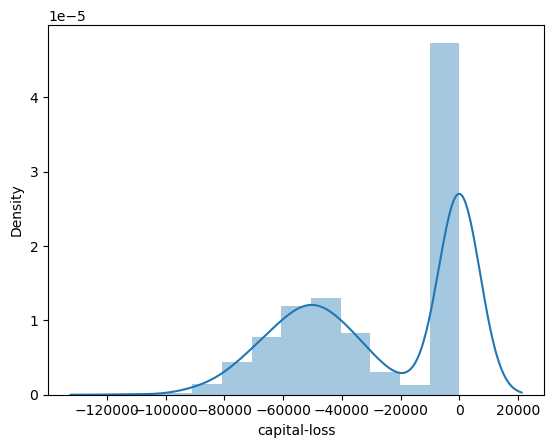

In [83]:
sns.distplot(df['capital-loss'])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

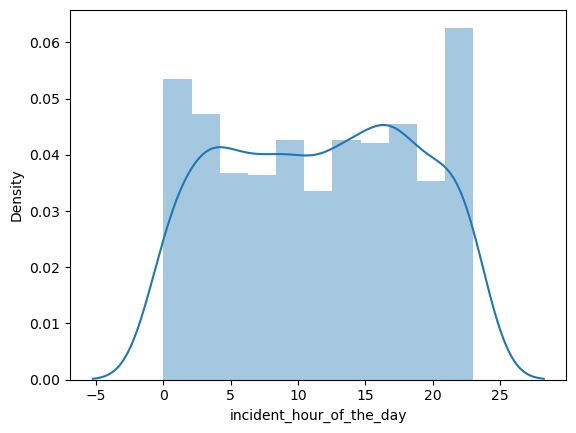

In [84]:
sns.distplot(df['incident_hour_of_the_day'])

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

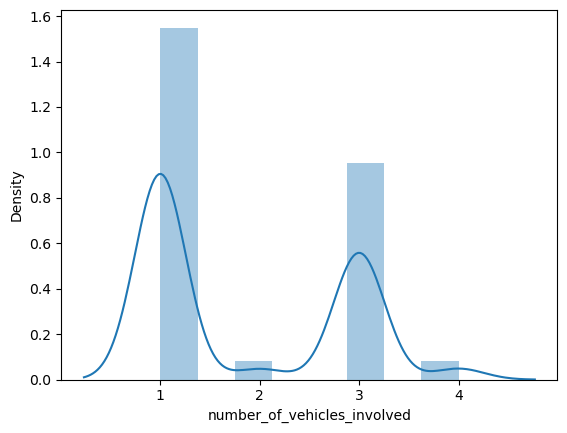

In [85]:
sns.distplot(df['number_of_vehicles_involved'])

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

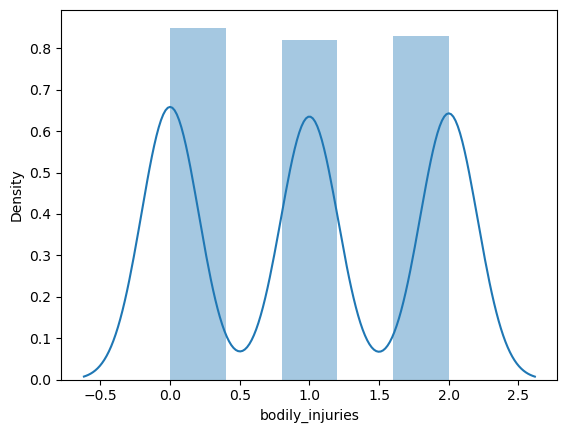

In [86]:
sns.distplot(df['bodily_injuries'])

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

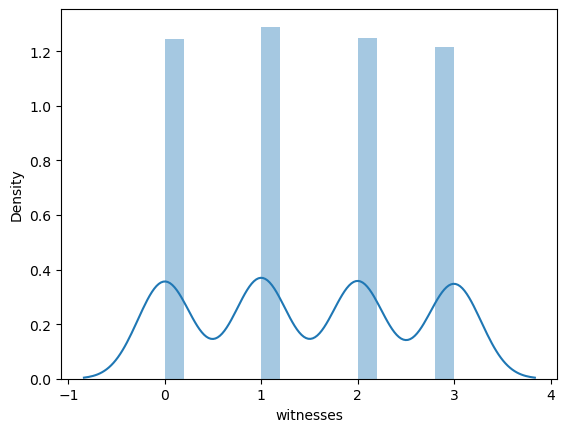

In [87]:
sns.distplot(df['witnesses'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

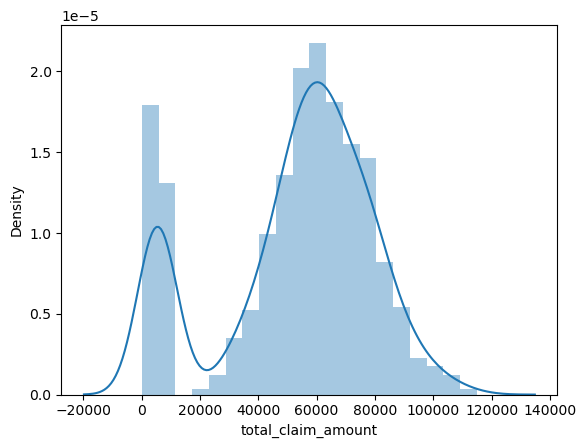

In [88]:
sns.distplot(df['total_claim_amount'])

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

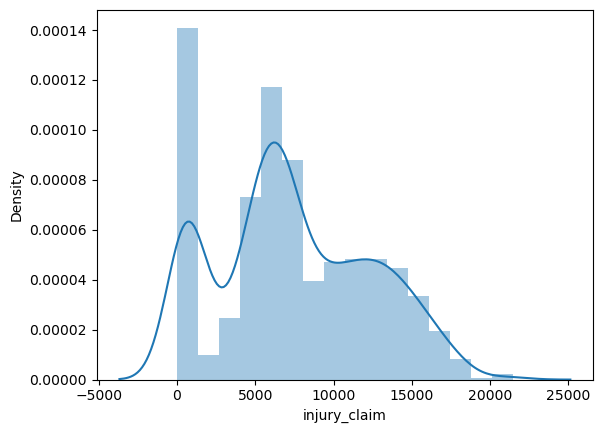

In [89]:
sns.distplot(df['injury_claim'])

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

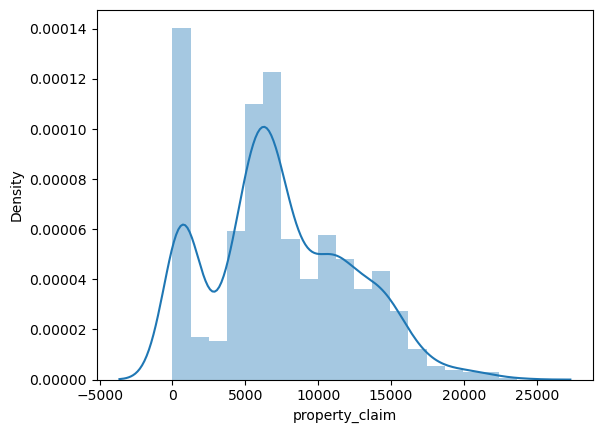

In [90]:
sns.distplot(df['property_claim'])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

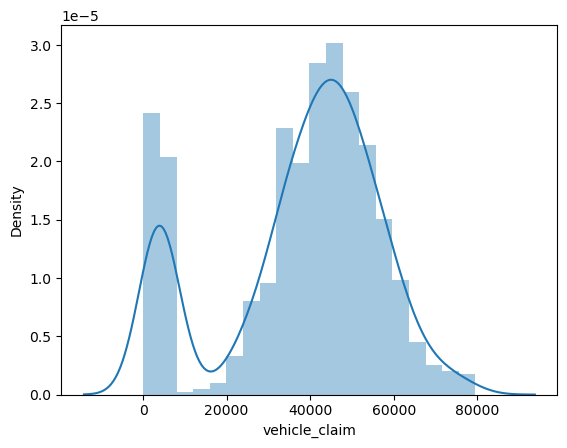

In [91]:
sns.distplot(df['vehicle_claim'])

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

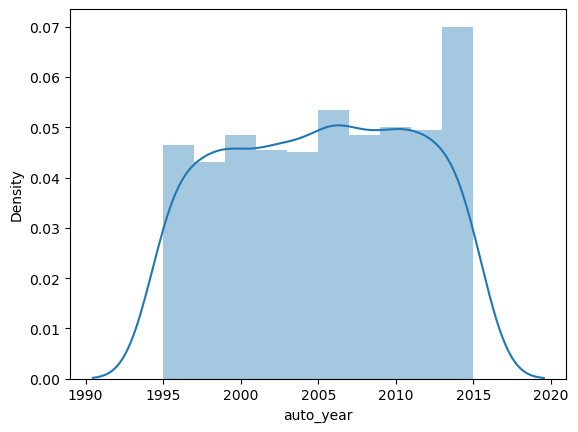

In [92]:
sns.distplot(df['auto_year'])

In [93]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

<AxesSubplot:xlabel='months_as_customer'>

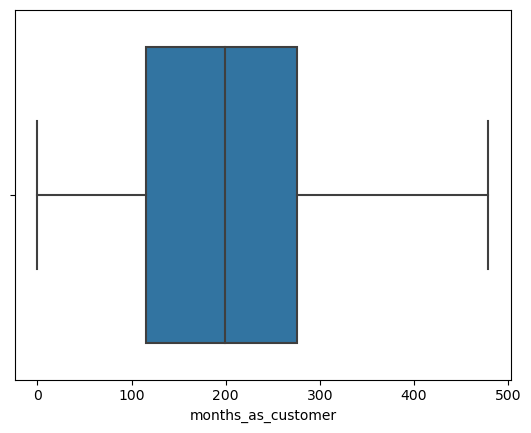

In [94]:
sns.boxplot(df['months_as_customer'])

<AxesSubplot:xlabel='age'>

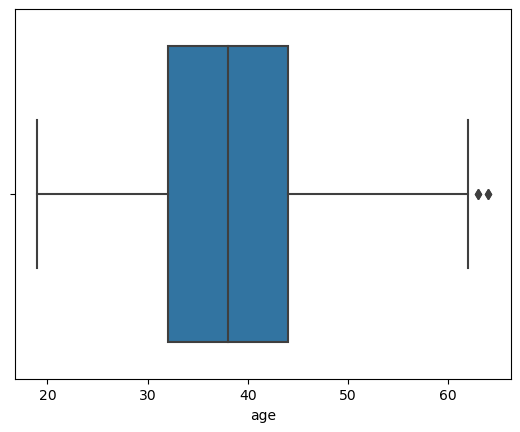

In [95]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='policy_number'>

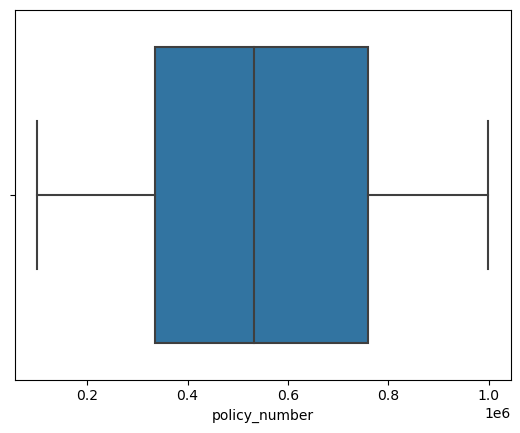

In [96]:
sns.boxplot(df['policy_number'])

<AxesSubplot:xlabel='policy_deductable'>

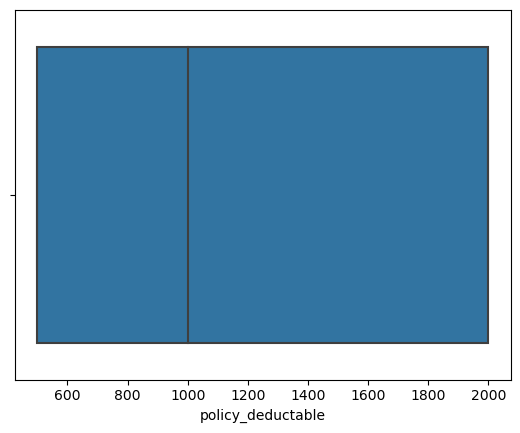

In [97]:
sns.boxplot(df['policy_deductable'])

<AxesSubplot:xlabel='policy_annual_premium'>

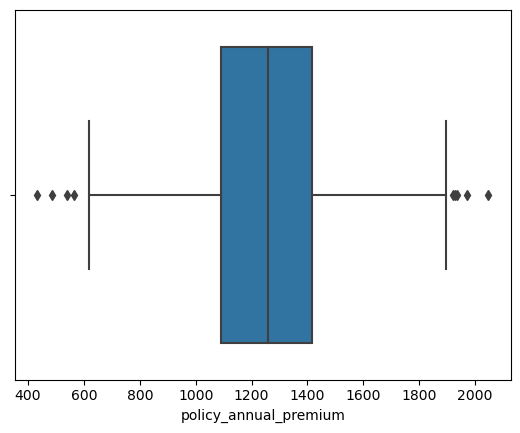

In [98]:
sns.boxplot(df['policy_annual_premium'])

<AxesSubplot:xlabel='umbrella_limit'>

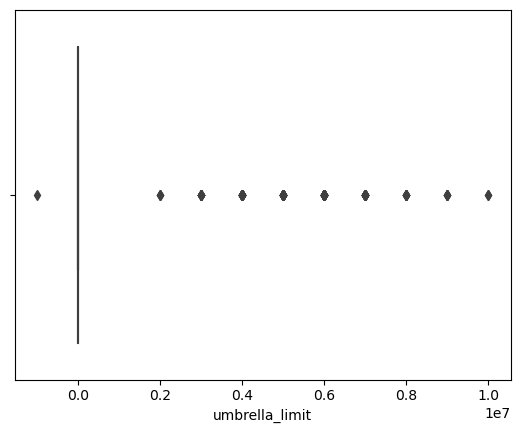

In [99]:
sns.boxplot(df['umbrella_limit'])

<AxesSubplot:xlabel='insured_zip'>

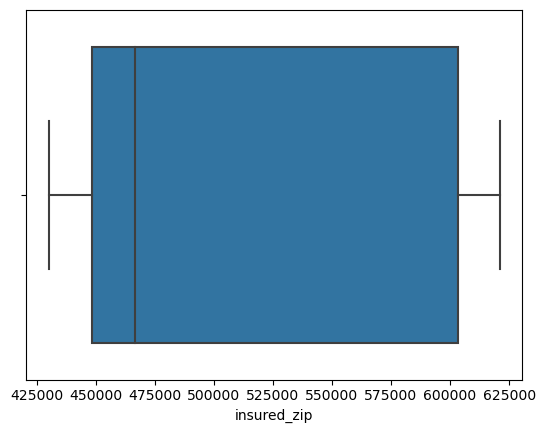

In [100]:
sns.boxplot(df['insured_zip'])

<AxesSubplot:xlabel='capital-gains'>

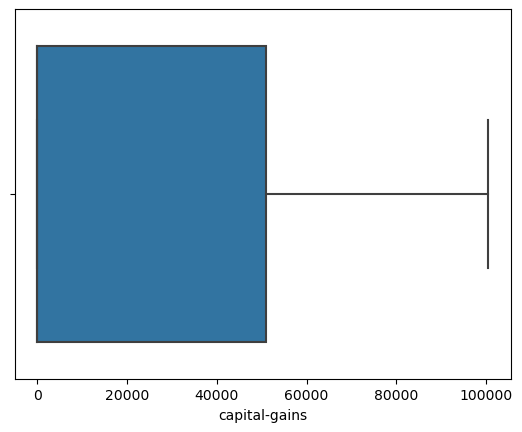

In [101]:
sns.boxplot(df['capital-gains'])

<AxesSubplot:xlabel='capital-loss'>

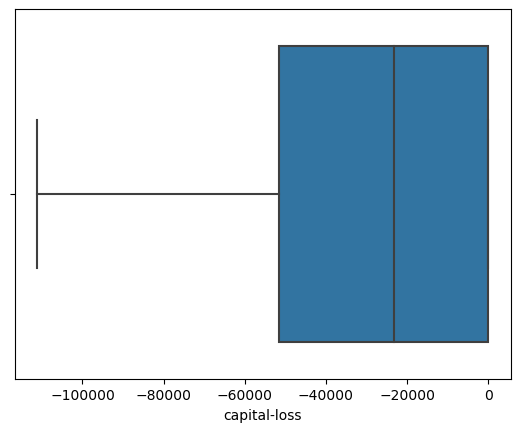

In [102]:
sns.boxplot(df['capital-loss'])

<AxesSubplot:xlabel='incident_hour_of_the_day'>

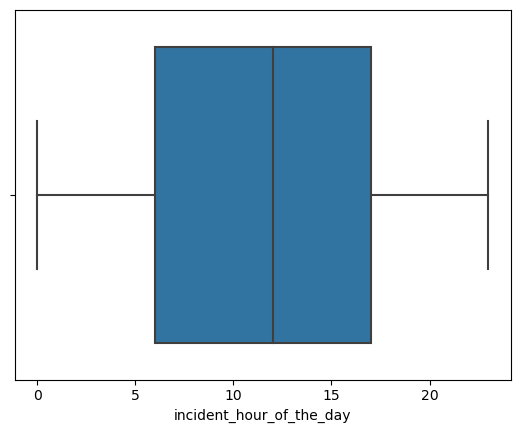

In [103]:
sns.boxplot(df['incident_hour_of_the_day'])

<AxesSubplot:xlabel='number_of_vehicles_involved'>

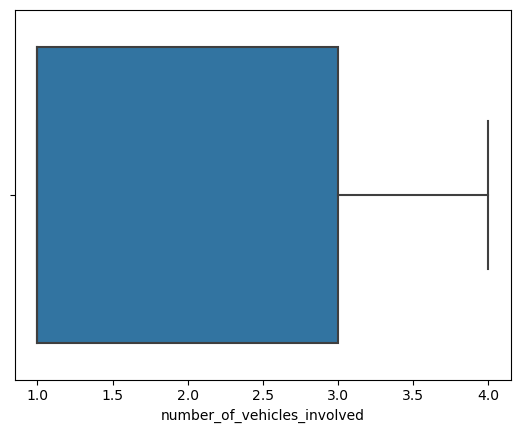

In [104]:
sns.boxplot(df['number_of_vehicles_involved'])

<AxesSubplot:xlabel='bodily_injuries'>

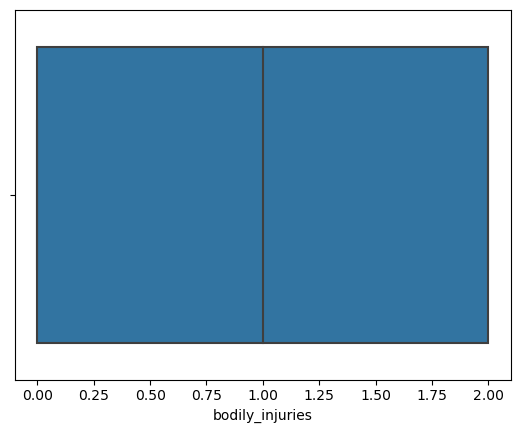

In [105]:
sns.boxplot(df['bodily_injuries'])

<AxesSubplot:xlabel='witnesses'>

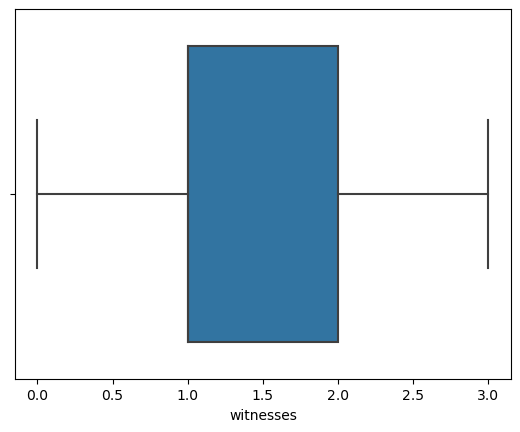

In [106]:
sns.boxplot(df['witnesses'])

<AxesSubplot:xlabel='total_claim_amount'>

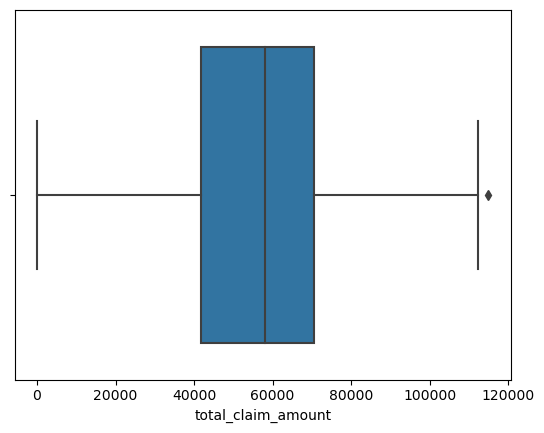

In [107]:
sns.boxplot(df['total_claim_amount'])

<AxesSubplot:xlabel='injury_claim'>

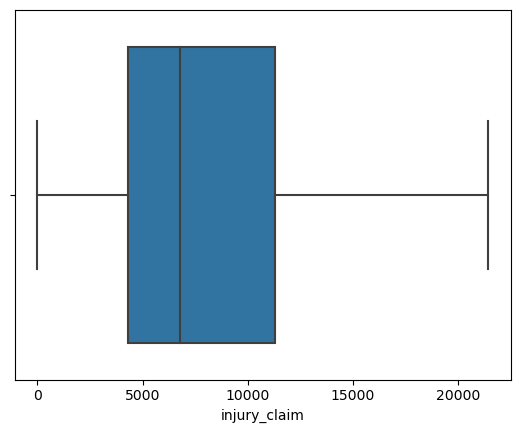

In [108]:
sns.boxplot(df['injury_claim'])

<AxesSubplot:xlabel='property_claim'>

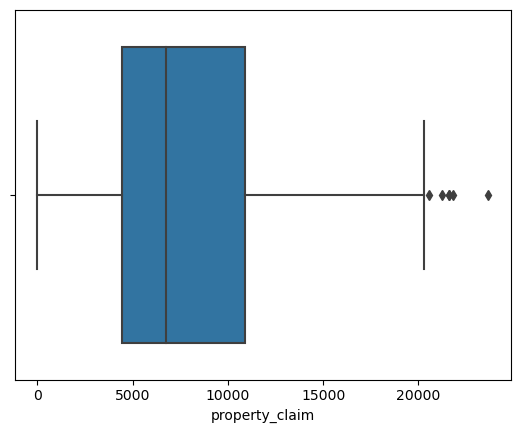

In [109]:
sns.boxplot(df['property_claim'])

<AxesSubplot:xlabel='vehicle_claim'>

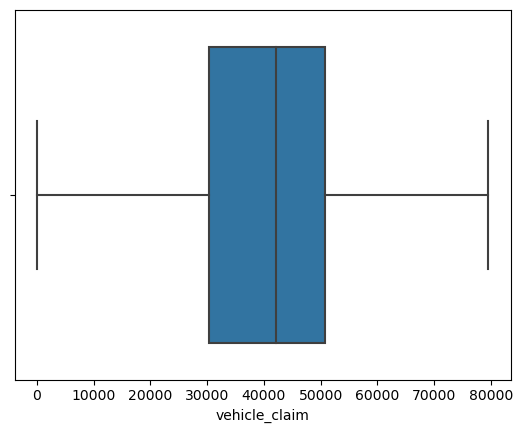

In [110]:
sns.boxplot(df['vehicle_claim'])

<AxesSubplot:xlabel='auto_year'>

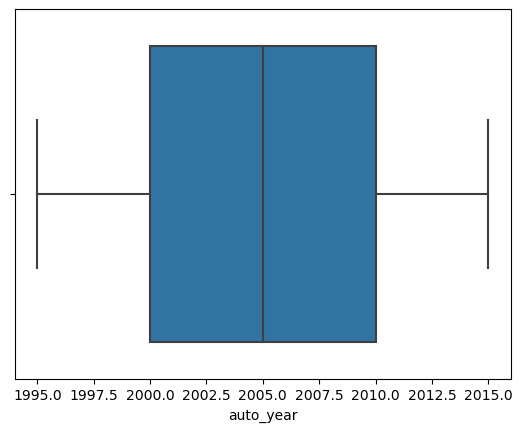

In [111]:
sns.boxplot(df['auto_year'])

In [112]:
df['policy_state']

0      OH
1      IN
2      OH
3      IL
4      IL
       ..
995    OH
996    IL
997    OH
998    IL
999    OH
Name: policy_state, Length: 1000, dtype: object

<AxesSubplot:xlabel='insured_education_level', ylabel='insured_occupation'>

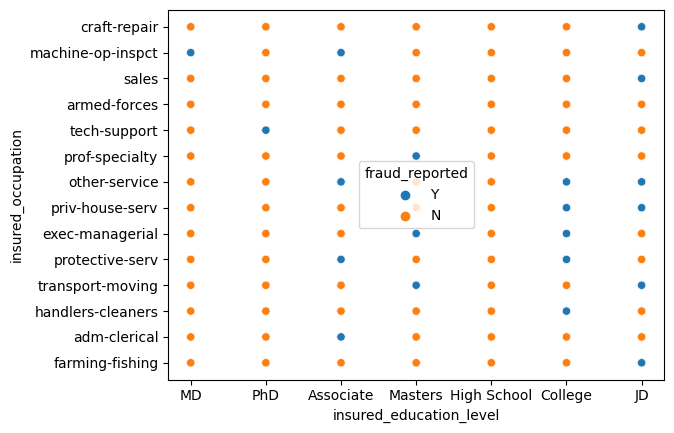

In [113]:
sns.scatterplot(x='insured_education_level',y='insured_occupation',hue='fraud_reported',data=df)

In [114]:
#People who belongs to armed forces have not report fraud, The people with JD and College educational level have reported false most of the time among all.

<AxesSubplot:xlabel='total_claim_amount', ylabel='capital-gains'>

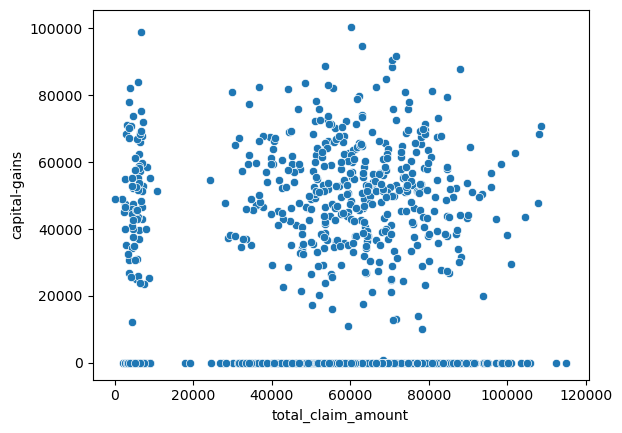

In [115]:
sns.scatterplot(x='total_claim_amount',y='capital-gains',data=df)

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='incident_type'>

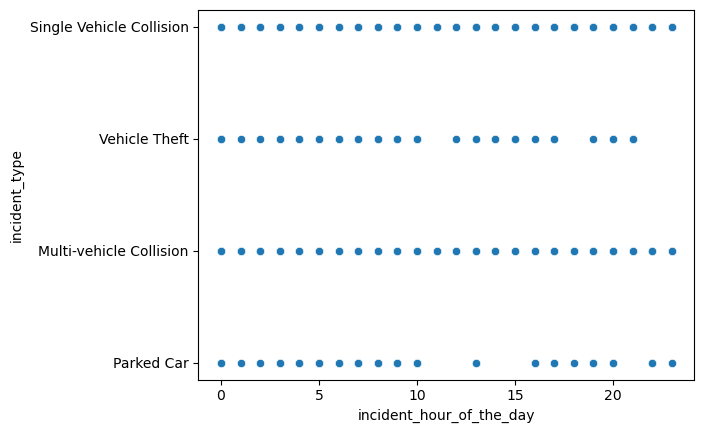

In [116]:
sns.scatterplot(x='incident_hour_of_the_day',y='incident_type',data=df)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

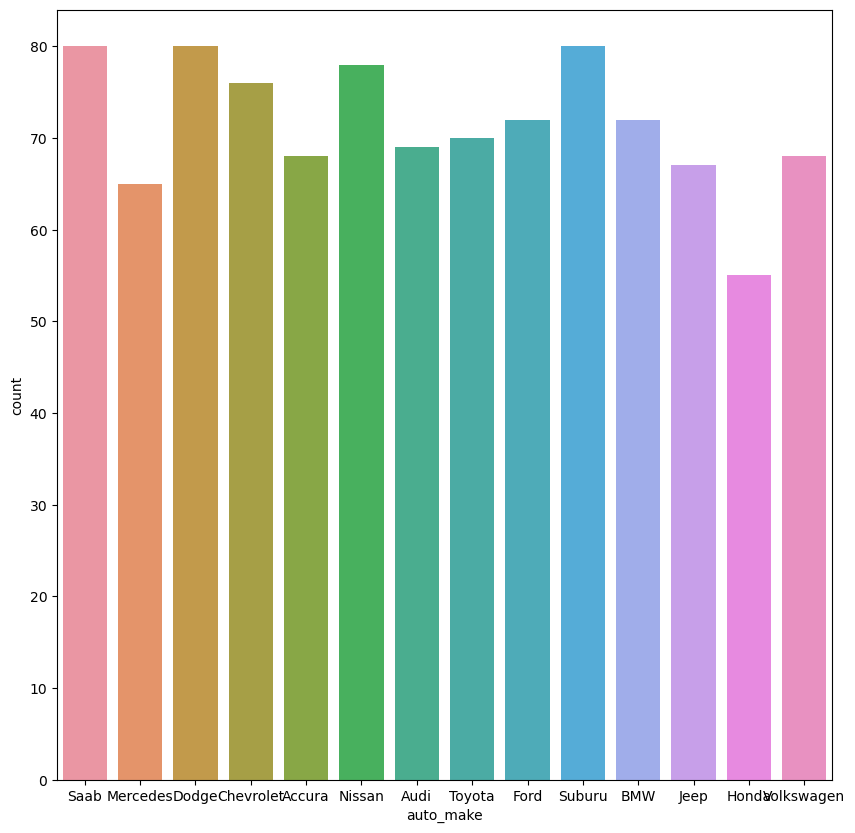

In [117]:
plt.figure(figsize=(10,10))
sns.countplot(df['auto_make'])

In [118]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,YES,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,...,3,YES,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


<AxesSubplot:xlabel='injury_claim', ylabel='auto_make'>

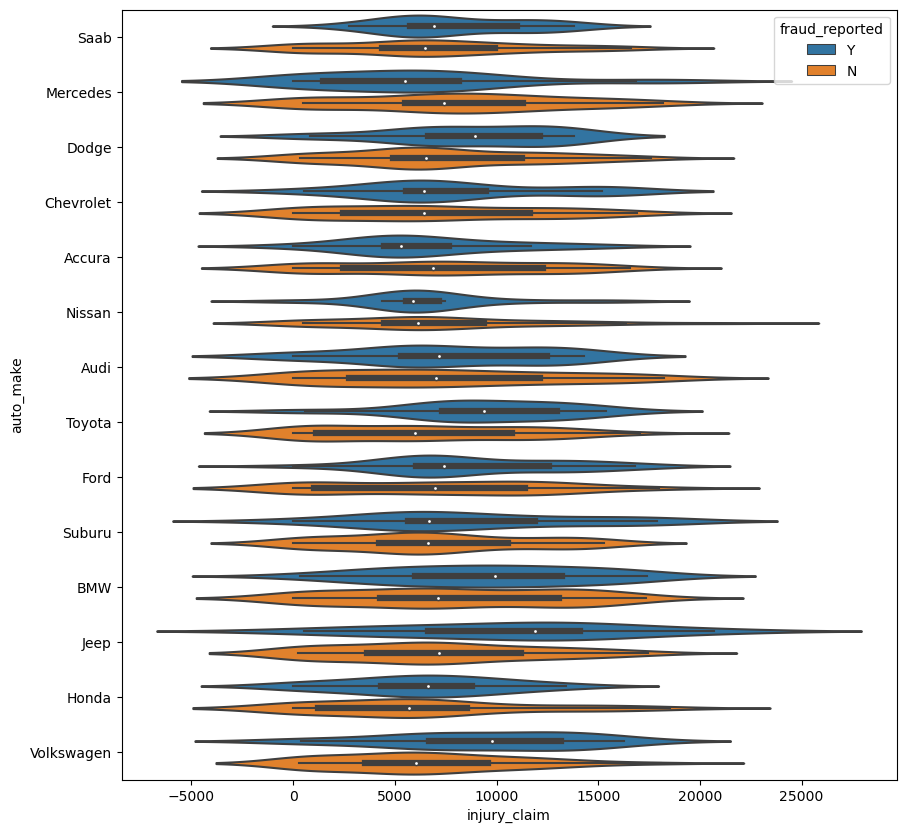

In [119]:
plt.figure(figsize=(10,10))
sns.violinplot(x='injury_claim',y='auto_make',hue='fraud_reported',data=df)

In [120]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [121]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [122]:
from scipy.stats import boxcox

In [123]:
df['insured_zip']=boxcox(df['insured_zip'],0)

In [124]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.782405
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [125]:
from scipy.stats import zscore

In [126]:
z=np.abs(zscore(df[['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']]))
z

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,1.078140,0.990836,0.095953,0.222383,0.616705,0.479476,0.462135,1.011331,0.953851,0.956261,0.823865,0.009759,0.461838,0.714257,0.189283,1.165505,0.749653,0.183440
1,0.208995,0.334073,0.791527,1.412784,0.242521,1.697980,0.430025,0.901927,0.953851,0.524475,0.823865,1.210174,1.338700,1.807312,1.363822,1.372696,1.823346,0.315491
2,0.608002,1.088913,0.550566,1.412784,0.642233,1.697980,1.043477,0.358023,0.953851,0.668404,1.140056,1.229693,1.362107,0.686362,0.054644,0.736072,0.785565,0.315491
3,0.452355,0.224613,1.239334,1.412784,0.652886,2.133471,1.489236,0.853388,1.267577,0.956261,0.823865,0.009759,0.461838,0.403135,0.224130,0.219722,0.677607,1.479664
4,0.208995,0.552994,0.695834,0.222383,1.341980,2.133471,1.520414,1.467210,0.683741,1.202666,0.823865,1.210174,0.438431,1.753121,1.257232,1.399654,1.768252,0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.539740,0.222383,0.222884,0.479476,1.032289,0.901927,0.953851,1.202666,0.823865,1.210174,0.438431,1.305049,2.051155,0.273817,1.224309,0.149180
996,0.704407,0.224613,1.398429,0.222383,0.739141,0.479476,1.489960,1.643100,0.953851,1.634452,0.823865,1.229693,1.362107,2.111466,2.182342,2.214794,1.821868,1.645974
997,0.642767,0.541611,1.448920,1.039966,0.520739,0.826998,0.839036,0.358023,0.953851,1.100189,1.140056,1.229693,1.362107,0.558507,0.013648,0.020826,0.771902,1.513924
998,2.208028,2.523284,0.047867,1.412784,0.411866,1.697980,0.857008,0.901927,0.953851,1.388046,0.823865,1.210174,0.438431,0.219110,0.453708,0.451976,0.073580,1.181303


In [127]:
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 15,  5,  5,  5,  4,  8,
         5,  5,  5], dtype=int64))

In [128]:
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,13.052224,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,13.056600,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,12.973009,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,13.318123,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,13.322371,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,12.974534,...,1,YES,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,13.318221,...,3,YES,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,13.000867,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,12.998418,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [129]:
df_new.shape

(980, 39)

In [130]:
df.shape

(1000, 39)

In [131]:
loss=(df.shape[0]-df_new.shape[0])/df.shape[0]

In [132]:
loss*100

2.0

In [133]:
df_new.cor=df_new.corr()
df_new.cor

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922960,0.061267,0.031041,-0.003814,0.018213,0.030130,0.007468,0.023041,0.066198,0.011831,-0.007674,0.063574,0.058761,0.065062,0.036660,0.055941,0.000869
age,0.922960,1.000000,0.062332,0.032036,0.005330,0.013256,0.035562,-0.004529,0.012860,0.083720,0.020391,-0.012254,0.056360,0.067812,0.077149,0.062375,0.058918,0.005594
policy_number,0.061267,0.062332,1.000000,-0.009812,0.028686,-0.000145,0.004778,0.013628,-0.005587,-0.000897,0.007744,-0.006242,-0.005587,-0.016199,-0.006386,-0.011147,-0.018152,-0.005574
policy_deductable,0.031041,0.032036,-0.009812,1.000000,-0.008300,0.013471,-0.005521,0.031673,-0.019601,0.064732,0.046331,-0.037263,0.071709,0.023835,0.038459,0.071031,0.005279,0.030569
policy_annual_premium,-0.003814,0.005330,0.028686,-0.008300,1.000000,-0.014107,0.047956,-0.006807,0.033133,-0.006448,-0.044544,0.027837,0.003433,-0.000223,-0.024119,-0.014073,0.009521,-0.042446
umbrella_limit,0.018213,0.013256,-0.000145,0.013471,-0.014107,1.000000,0.003978,-0.022753,-0.025844,-0.022571,-0.041298,0.047719,-0.001363,-0.047348,-0.046298,-0.021380,-0.048740,0.027952
insured_zip,0.030130,0.035562,0.004778,-0.005521,0.047956,0.003978,1.000000,0.008671,0.045390,0.009029,0.022084,0.027606,0.017185,-0.035214,-0.019325,-0.007894,-0.042202,-0.041631
capital-gains,0.007468,-0.004529,0.013628,0.031673,-0.006807,-0.022753,0.008671,1.000000,-0.047387,-0.016288,0.057932,0.047421,-0.018701,0.011311,0.021430,-0.009262,0.012609,0.029903
capital-loss,0.023041,0.012860,-0.005587,-0.019601,0.033133,-0.025844,0.045390,-0.047387,1.000000,-0.029339,-0.007438,-0.031480,-0.037671,-0.034722,-0.044049,-0.021848,-0.031555,-0.062780
incident_hour_of_the_day,0.066198,0.083720,-0.000897,0.064732,-0.006448,-0.022571,0.009029,-0.016288,-0.029339,1.000000,0.120599,-0.033120,0.006843,0.219460,0.173753,0.176317,0.216856,0.016597


<AxesSubplot:>

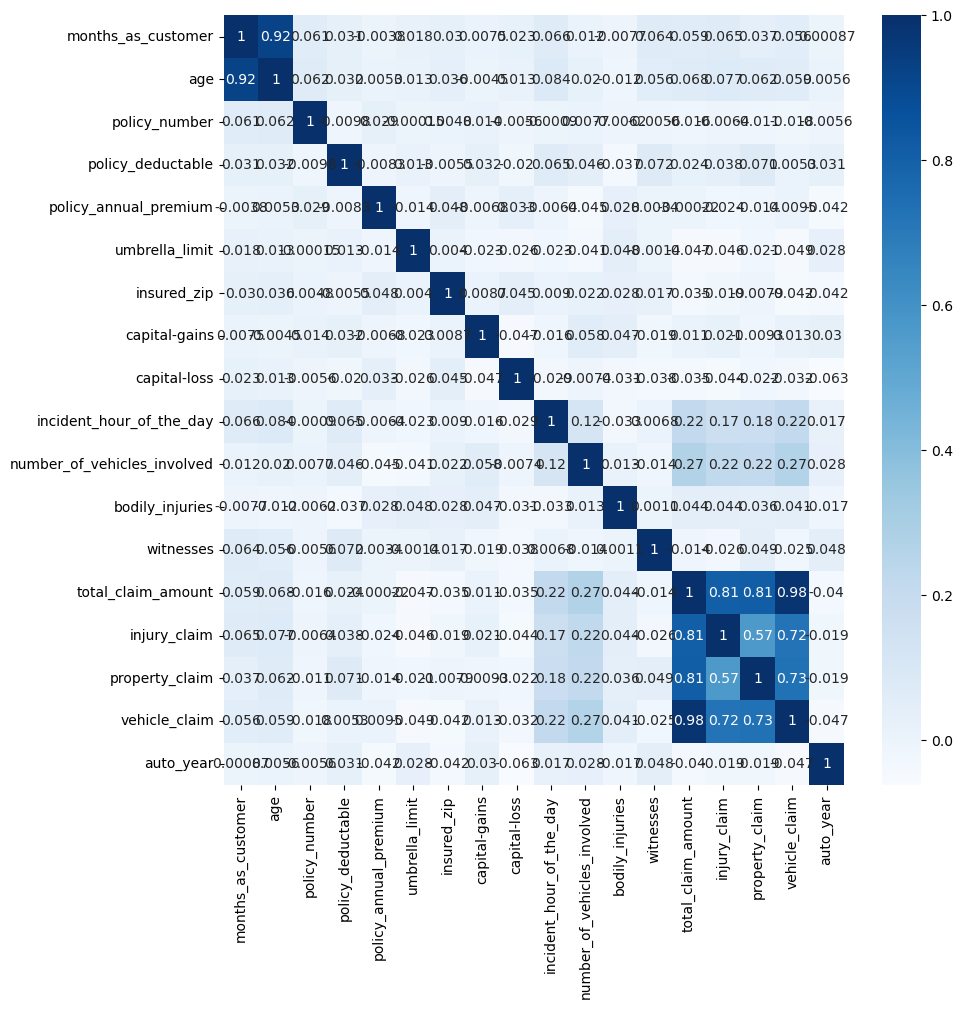

In [134]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.cor,annot=True,cmap='Blues')

In [135]:
df_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,13.052224,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,13.056600,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,12.973009,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,13.318123,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,13.322371,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,12.974534,...,1,YES,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,13.318221,...,3,YES,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,13.000867,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,12.998418,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
le=LabelEncoder()

In [138]:
for i in df_new.columns:
    if df_new[i].dtypes=='object':
        df_new[i]=le.fit_transform(df_new[i])

In [139]:
df_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,1,1000,1406.91,0,13.052224,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,1,2000,1197.22,5000000,13.056600,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-06-09,2,0,2000,1413.14,5000000,12.973009,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,0,1,2000,1415.74,6000000,13.318123,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,0,2,1000,1583.91,6000000,13.322371,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,2,2,1000,1310.80,0,12.974534,...,1,1,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,2014-05-01,0,0,1000,1436.79,0,13.318221,...,3,1,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,2003-02-17,2,1,500,1383.49,3000000,13.000867,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,2011-11-18,0,2,2000,1356.92,5000000,12.998418,...,1,1,46980,5220,5220,36540,1,5,1998,0


In [140]:
#Separating Features and Target variables

In [141]:
df_new.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                            int32
policy_csl                              int32
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                           float64
insured_sex                             int32
insured_education_level                 int32
insured_occupation                      int32
insured_hobbies                         int32
insured_relationship                    int32
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                           int32
collision_type                          int32
incident_severity                       int32
authorities_contacted             

In [142]:
df_new['Bind Month']=df_new['policy_bind_date'].apply(lambda x:x.month)
df_new['Bind Day ']=df_new['policy_bind_date'].apply(lambda x:x.day)
df_new['Bind Year']=df_new['policy_bind_date'].apply(lambda x:x.year)

In [143]:
df_new.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.802553
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.066174
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location              0.000000
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725


In [144]:
df_new['Incident_Day']=df_new['incident_date'].apply(lambda x:x.day)
df_new['Incident_Month']=df_new['incident_date'].apply(lambda x:x.month)
df_new['Incident_Year']=df_new['incident_date'].apply(lambda x:x.year)

In [145]:
df_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_make,auto_model,auto_year,fraud_reported,Bind Month,Bind Day,Bind Year,Incident_Day,Incident_Month,Incident_Year
0,328,48,521585,2014-10-17,2,1,1000,1406.91,0,13.052224,...,10,1,2004,1,10,17,2014,25,1,2015
1,228,42,342868,2006-06-27,1,1,2000,1197.22,5000000,13.056600,...,8,12,2007,1,6,27,2006,21,1,2015
2,134,29,687698,2000-06-09,2,0,2000,1413.14,5000000,12.973009,...,4,30,2007,0,6,9,2000,22,2,2015
3,256,41,227811,1990-05-25,0,1,2000,1415.74,6000000,13.318123,...,3,34,2014,1,5,25,1990,1,10,2015
4,228,44,367455,2014-06-06,0,2,1000,1583.91,6000000,13.322371,...,0,31,2009,0,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,2,2,1000,1310.80,0,12.974534,...,6,6,2006,0,7,16,1991,22,2,2015
996,285,41,186934,2014-05-01,0,0,1000,1436.79,0,13.318221,...,13,28,2015,0,5,1,2014,24,1,2015
997,130,34,918516,2003-02-17,2,1,500,1383.49,3000000,13.000867,...,11,19,1996,0,2,17,2003,23,1,2015
998,458,62,533940,2011-11-18,0,2,2000,1356.92,5000000,12.998418,...,1,5,1998,0,11,18,2011,26,2,2015


In [146]:
df_new.drop(['incident_date','policy_bind_date'],axis=1,inplace=True)

In [147]:
df_new

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,Bind Month,Bind Day,Bind Year,Incident_Day,Incident_Month,Incident_Year
0,328,48,521585,2,1,1000,1406.91,0,13.052224,1,...,10,1,2004,1,10,17,2014,25,1,2015
1,228,42,342868,1,1,2000,1197.22,5000000,13.056600,1,...,8,12,2007,1,6,27,2006,21,1,2015
2,134,29,687698,2,0,2000,1413.14,5000000,12.973009,0,...,4,30,2007,0,6,9,2000,22,2,2015
3,256,41,227811,0,1,2000,1415.74,6000000,13.318123,0,...,3,34,2014,1,5,25,1990,1,10,2015
4,228,44,367455,0,2,1000,1583.91,6000000,13.322371,1,...,0,31,2009,0,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,12.974534,0,...,6,6,2006,0,7,16,1991,22,2,2015
996,285,41,186934,0,0,1000,1436.79,0,13.318221,0,...,13,28,2015,0,5,1,2014,24,1,2015
997,130,34,918516,2,1,500,1383.49,3000000,13.000867,0,...,11,19,1996,0,2,17,2003,23,1,2015
998,458,62,533940,0,2,2000,1356.92,5000000,12.998418,1,...,1,5,1998,0,11,18,2011,26,2,2015


In [148]:
x=df_new.drop('fraud_reported',axis=1)

In [149]:
x

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,Bind Month,Bind Day,Bind Year,Incident_Day,Incident_Month,Incident_Year
0,328,48,521585,2,1,1000,1406.91,0,13.052224,1,...,52080,10,1,2004,10,17,2014,25,1,2015
1,228,42,342868,1,1,2000,1197.22,5000000,13.056600,1,...,3510,8,12,2007,6,27,2006,21,1,2015
2,134,29,687698,2,0,2000,1413.14,5000000,12.973009,0,...,23100,4,30,2007,6,9,2000,22,2,2015
3,256,41,227811,0,1,2000,1415.74,6000000,13.318123,0,...,50720,3,34,2014,5,25,1990,1,10,2015
4,228,44,367455,0,2,1000,1583.91,6000000,13.322371,1,...,4550,0,31,2009,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,12.974534,0,...,61040,6,6,2006,7,16,1991,22,2,2015
996,285,41,186934,0,0,1000,1436.79,0,13.318221,0,...,72320,13,28,2015,5,1,2014,24,1,2015
997,130,34,918516,2,1,500,1383.49,3000000,13.000867,0,...,52500,11,19,1996,2,17,2003,23,1,2015
998,458,62,533940,0,2,2000,1356.92,5000000,12.998418,1,...,36540,1,5,1998,11,18,2011,26,2,2015


In [150]:
y=df_new['fraud_reported']

In [151]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

In [152]:
x.shape

(980, 42)

In [153]:
y.shape

(980,)

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler=StandardScaler()

In [156]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [158]:
x.drop('policy_number',axis=1,inplace=True)

In [159]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif['Features']=x.columns

In [160]:
vif

,values,Features
0,6.910749,months_as_customer
1,6.916694,age
2,1.036778,policy_state
3,1.034611,policy_csl
4,1.050456,policy_deductable
5,1.035952,policy_annual_premium
6,1.043742,umbrella_limit
7,1.035728,insured_zip
8,1.032447,insured_sex
9,1.049397,insured_education_level


In [161]:
df_new['total_claim_amount'].value_counts()

70290    4
59400    4
60600    4
4320     4
70400    4
        ..
87100    1
6240     1
66600    1
70920    1
67500    1
Name: total_claim_amount, Length: 752, dtype: int64

In [162]:
df_new['Incident_Year'].isnull().sum()

0

In [163]:
df_new['Incident_Year']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
995    2015
996    2015
997    2015
998    2015
999    2015
Name: Incident_Year, Length: 980, dtype: int64

In [164]:
df_new['total_claim_amount'].nunique()

752

In [165]:
x.drop(['total_claim_amount','Incident_Year'],axis=1,inplace=True)

In [166]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif['Features']=x.columns

In [167]:
vif

,values,Features
0,6.910749,months_as_customer
1,6.916694,age
2,1.036778,policy_state
3,1.034611,policy_csl
4,1.050456,policy_deductable
5,1.035952,policy_annual_premium
6,1.043742,umbrella_limit
7,1.035728,insured_zip
8,1.032447,insured_sex
9,1.049397,insured_education_level


In [168]:
y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [169]:
from imblearn.over_sampling import SMOTE

In [170]:
SM=SMOTE()

In [171]:
x1,y1=SM.fit_resample(x,y)

In [172]:
y1.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier


In [177]:
MaxAcc=0
MaxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    MaxAcc=acc
    MaxRS=i
print('MaxAcc=',acc,'MaxRS=',MaxRS)

MaxAcc= 0.7364864864864865 MaxRS= 199


In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=MaxRS)

In [179]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print('Accuracy Score=',accuracy_score(y_test,predLR))
print('Confusion Matrix=',confusion_matrix(y_test,predLR))
print('Classification Report=',classification_report(y_test,predLR))

Accuracy Score= 0.8163265306122449
Confusion Matrix= [[212  20]
 [ 34  28]]
Classification Report=               precision    recall  f1-score   support

           0       0.86      0.91      0.89       232
           1       0.58      0.45      0.51        62

    accuracy                           0.82       294
   macro avg       0.72      0.68      0.70       294
weighted avg       0.80      0.82      0.81       294



In [180]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print('Accuracy Score=',accuracy_score(y_test,predRFC))
print('Confusion Matrix=',confusion_matrix(y_test,predRFC))
print('Classification Report=',classification_report(y_test,predRFC))

Accuracy Score= 0.7993197278911565
Confusion Matrix= [[215  17]
 [ 42  20]]
Classification Report=               precision    recall  f1-score   support

           0       0.84      0.93      0.88       232
           1       0.54      0.32      0.40        62

    accuracy                           0.80       294
   macro avg       0.69      0.62      0.64       294
weighted avg       0.77      0.80      0.78       294



In [181]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC=GBC.predict(x_test)
print('Accuracy Score=',accuracy_score(y_test,predGBC))
print('Confusion Matrix=',confusion_matrix(y_test,predGBC))
print('Classification Report=',classification_report(y_test,predGBC))

Accuracy Score= 0.8435374149659864
Confusion Matrix= [[202  30]
 [ 16  46]]
Classification Report=               precision    recall  f1-score   support

           0       0.93      0.87      0.90       232
           1       0.61      0.74      0.67        62

    accuracy                           0.84       294
   macro avg       0.77      0.81      0.78       294
weighted avg       0.86      0.84      0.85       294



In [182]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print('Accuracy Score=',accuracy_score(y_test,predBC))
print('Confusion Matrix=',confusion_matrix(y_test,predBC))
print('Classification report=',classification_report(y_test,predBC))

Accuracy Score= 0.8775510204081632
Confusion Matrix= [[211  21]
 [ 15  47]]
Classification report=               precision    recall  f1-score   support

           0       0.93      0.91      0.92       232
           1       0.69      0.76      0.72        62

    accuracy                           0.88       294
   macro avg       0.81      0.83      0.82       294
weighted avg       0.88      0.88      0.88       294



In [183]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print('Accuracy Score=',accuracy_score(y_test,predABC))
print('Confusion Matrix=',confusion_matrix(y_test,predABC))
print('Classification Report=',classification_report(y_test,predABC))

Accuracy Score= 0.8163265306122449
Confusion Matrix= [[211  21]
 [ 33  29]]
Classification Report=               precision    recall  f1-score   support

           0       0.86      0.91      0.89       232
           1       0.58      0.47      0.52        62

    accuracy                           0.82       294
   macro avg       0.72      0.69      0.70       294
weighted avg       0.80      0.82      0.81       294



In [184]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score=',accuracy_score(y_test,predsvc))
print('Confusion Matrix=',confusion_matrix(y_test,predsvc))
print('classification_report=',classification_report(y_test,predsvc))

Accuracy Score= 0.782312925170068
Confusion Matrix= [[226   6]
 [ 58   4]]
classification_report=               precision    recall  f1-score   support

           0       0.80      0.97      0.88       232
           1       0.40      0.06      0.11        62

    accuracy                           0.78       294
   macro avg       0.60      0.52      0.49       294
weighted avg       0.71      0.78      0.71       294



In [185]:
ETC=ExtraTreeClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print('Accuracy Score=',accuracy_score(y_test,predETC))
print('Confusion Matrix=',confusion_matrix(y_test,predETC))
print('Classification Report=',classification_report(y_test,predETC))

Accuracy Score= 0.6700680272108843
Confusion Matrix= [[167  65]
 [ 32  30]]
Classification Report=               precision    recall  f1-score   support

           0       0.84      0.72      0.77       232
           1       0.32      0.48      0.38        62

    accuracy                           0.67       294
   macro avg       0.58      0.60      0.58       294
weighted avg       0.73      0.67      0.69       294



In [186]:
from sklearn.model_selection import cross_val_score

In [187]:
cv=5
score=cross_val_score(LR,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cv score :',(accuracy_score(y_test,predLR)-(score.mean())))

[0.78061224 0.76530612 0.74489796 0.79081633 0.76530612]
0.7693877551020408
Difference between accuracy score and cv score : 0.04693877551020409


In [188]:
cv=5
score=cross_val_score(RFC,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cv score :',(accuracy_score(y_test,predRFC)-(score.mean())))

[0.76020408 0.76020408 0.7755102  0.79591837 0.79081633]
0.776530612244898
Difference between accuracy score and cv score : 0.022789115646258407


In [189]:
cv=5
score=cross_val_score(GBC,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cv score :',(accuracy_score(y_test,predGBC)-(score.mean())))

[0.81122449 0.79081633 0.79081633 0.8622449  0.85204082]
0.8214285714285714
Difference between accuracy score and cv score : 0.022108843537415046


In [190]:
cv=5
score=cross_val_score(ABC,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cv score :',(accuracy_score(y_test,predABC)-(score.mean())))

[0.7755102  0.7755102  0.73979592 0.82142857 0.83163265]
0.7887755102040817
Difference between accuracy score and cv score : 0.027551020408163263


In [191]:
cv=5
score=cross_val_score(BC,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cv score :',(accuracy_score(y_test,predBC)-(score.mean())))

[0.78061224 0.80612245 0.82142857 0.81122449 0.83163265]
0.810204081632653
Difference between accuracy score and cv score : 0.06734693877551023


In [192]:
cv=5
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cv score :',(accuracy_score(y_test,predsvc)-(score.mean())))

[0.76020408 0.73469388 0.75510204 0.76020408 0.75510204]
0.753061224489796
Difference between accuracy score and cv score : 0.029251700680272053


In [193]:
cv=5
score=cross_val_score(ETC,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cv score :',(accuracy_score(y_test,predETC)-(score.mean())))

[0.63265306 0.72959184 0.75       0.73979592 0.71428571]
0.7132653061224491
Difference between accuracy score and cv score : -0.043197278911564774


In [194]:
#From the difference of both accuracy socre and cross validation score computed on accuracy score. We are selecting Gradient Boosting Classifier as our best fitting model

In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
parameters={'learning_rate':[2,10,1,15],
           'n_estimators':[3,12,15,19],
           'min_samples_split':[2],
           'max_depth':[3],
           'random_state':[2,10,12,16]}

In [200]:
gscv=GridSearchCV(GBC,parameters,cv=2)
gscv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [2, 10, 1, 15], 'max_depth': [3],
                         'min_samples_split': [2],
                         'n_estimators': [3, 12, 15, 19],
                         'random_state': [2, 10, 12, 16]})

In [201]:
gscv.best_params_

{'learning_rate': 1,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 3,
 'random_state': 10}

In [203]:
Model=GradientBoostingClassifier(learning_rate=1,max_depth=3,min_samples_split=2,n_estimators=3,random_state=10)
Model.fit(x_train,y_train)
predModel=Model.predict(x_test)
acc=accuracy_score(y_test,predModel)
print(acc*100)

84.01360544217688


In [204]:
import joblib

In [205]:
joblib.dump(Model,'Detection')

['Detection']

In [206]:
model=joblib.load('Detection')

In [207]:
predictions=model.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [210]:
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,284,285,286,287,288,289,290,291,292,293
Predicted,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,1,1,0,...,1,0,0,1,1,0,0,0,0,0
